#What is a Classification problem ?

### Background
So far we've learned that **Linear Regression** can be used to predict features like ***prices, temperture, and more.*** 

**The predicted value in linear regression is continuous!**

And when we want to handle a problem like:
1. Is a saliva sample infected with the corona virus or not?
2. Will a customer buy a product or not?
3. Which party is a pesron going to vote for? "Aaaa", "Bbbbb", "Ccc" etc.

All of these problems are classification problems where the dependenth value is discrete(categorical).



###Logistic regression

**Logistic Regression** is a Machine Learning classification algorithm that is used to **predict the probability of a categorical dependent variable**. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

* **Binary classification problem** - when there is a single predicted value. for example: Corona detected or not. 
* **Multiclass Classification problem** - when there are varias predicted values possible. for example: voting in elections.

#### For simplicity we shall start with a Binary classification problem code example

#The Problem - To predict if a passenger of the titanic survived or not

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go


In [ ]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/titanic.csv', index_col='PassengerId')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


### Know your data
This is some info of the titanic dataset features:

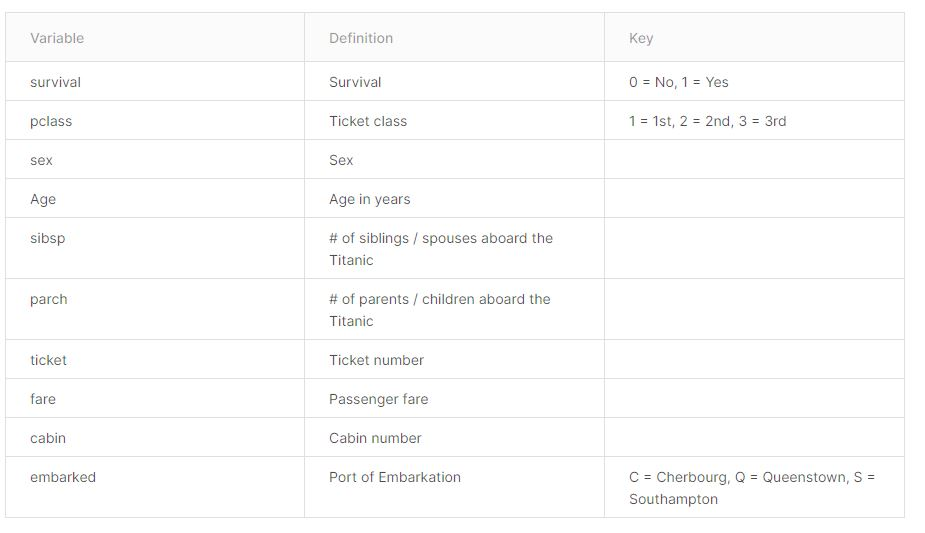

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  WikiId       1304 non-null   float64
 12  Name_wiki    1304 non-null   object 
 13  Age_wiki     1302 non-null   float64
 14  Hometown     1304 non-null   object 
 15  Boarded      1304 non-null   object 
 16  Destination  1304 non-null   object 
 17  Lifeboat     502 non-null    object 
 18  Body         130 non-null    object 
 19  Class 

In [ ]:
titanic_df.isna().sum()

Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

#Data preprocessing


In [ ]:
titanic_df.dropna(thresh=800, axis=1, inplace=True)
titanic_df.drop(['Age','Boarded', 'Destination', 'Hometown', 'Ticket', 'Name','WikiId', 'Class','Name_wiki', 'WikiId'], axis=1, inplace=True)
titanic_df.Fare.fillna(titanic_df.Fare.median(), inplace=True)
titanic_df.Embarked.fillna('S', inplace=True)
titanic_df.Age_wiki.fillna(titanic_df.Age_wiki.mean(), inplace=True)
titanic_df.dropna(inplace=True)
titanic_df.rename(columns={'Age_wiki':'Age'}, inplace=True)
titanic_df = titanic_df.astype({'Survived':'int32'})
titanic_df.drop_duplicates()
titanic_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
PassengerId,,,,,,,,
1,0,3,male,1,0,7.2500,S,22.0
2,1,1,female,1,0,71.2833,C,35.0
3,1,3,female,0,0,7.9250,S,26.0
4,1,1,female,1,0,53.1000,S,35.0
5,0,3,male,0,0,8.0500,S,35.0


## More data preprocessing 

Replacing the SibSp and Parch with a binary categorical variable named 'Family'.

Family = 1 means that the person has a family on board and 0 means that the person is travelling alone.

In [ ]:
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0
titanic_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age,Family
PassengerId,,,,,,,,,
1,0,3,male,1,0,7.2500,S,22.0,1
2,1,1,female,1,0,71.2833,C,35.0,1
3,1,3,female,0,0,7.9250,S,26.0,0
4,1,1,female,1,0,53.1000,S,35.0,1
5,0,3,male,0,0,8.0500,S,35.0,0


In [ ]:
titanic_df.drop(['SibSp','Parch'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Age,Family
PassengerId,,,,,,,
1,0,3,male,7.2500,S,22.0,1
2,1,1,female,71.2833,C,35.0,1
3,1,3,female,7.9250,S,26.0,0
4,1,1,female,53.1000,S,35.0,1
5,0,3,male,8.0500,S,35.0,0


Add a 'child' category if age is 16 or smaller.

In [ ]:
titanic_df.Sex.loc[titanic_df.Age<=16]='child'
titanic_df.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Survived,Pclass,Sex,Fare,Embarked,Age,Family
PassengerId,,,,,,,
1,0,3,male,7.2500,S,22.0,1
2,1,1,female,71.2833,C,35.0,1
3,1,3,female,7.9250,S,26.0,0
4,1,1,female,53.1000,S,35.0,1
5,0,3,male,8.0500,S,35.0,0
6,0,3,male,8.4583,Q,22.0,0
7,0,1,male,51.8625,S,54.0,0
8,0,3,child,21.0750,S,2.0,1
9,1,3,female,11.1333,S,26.0,1


##Handling Categorical features

When dealing with categorical data -The variables contain descrete values rather than continous values.

In Categorical features, the number of possible values is often limited to a fixed set.  

Categorical values can be of two types:

* nominal- for example : apple, orange, banana, pineapple...
* ordinal- for example : Excellent, very good, good, not so good, bad. rank[1-5]



### Dummy variables / One hot encoding

We should be careful of giving ordinal values to categorical feature becuase our model priorities value importance by it's numeric value and might conclude that there is a certain order in the data.

For example:
If we would change the Embarked values from S, C, Q to 1, 2, 3 it would mean that Q comes after S.

Instead we should use dummy variables.
This is best explained via an example


In [ ]:

sex_df = pd.get_dummies(titanic_df.Sex)
sex_df.head()

,child,female,male
PassengerId,,,
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1


We should also drop one of the columns. We can say that if the person is not a male or a female - It must be a child.

In [ ]:
sex_df = pd.get_dummies(titanic_df.Sex, drop_first=True)
sex_df.head(10)

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,0,1
8,0,0
9,1,0


#Excercise
1. Create dummy variables dataframe for the 'Embarked' and 'Pclass' variables. Make sure to change the column names to meaningful ones.
2. Add the new DFs to the titanik DF.
3. Drop the original categorical features
4. Print the head of the new titanic DF

In [ ]:
#1
embarked_df = pd.get_dummies(titanic_df.Embarked, drop_first=True)
embarked_df.columns=['Embarked_Q', 'Embarked_S']
pclass_df = pd.get_dummies(titanic_df.Pclass, drop_first=True)
pclass_df.columns=['Second_Cls', 'Third_Cls']



In [ ]:
#2
titanic_df = pd.concat([titanic_df, embarked_df, pclass_df, sex_df], axis=1)


In [ ]:
#3
titanic_df.drop(['Embarked', 'Pclass', 'Sex'], inplace=True, axis=1)

In [ ]:
#4
titanic_df.head()

,Survived,Fare,Age,Family,Embarked_Q,Embarked_S,Second_Cls,Third_Cls,female,male
PassengerId,,,,,,,,,,
1,0,7.2500,22.0,1,0,1,0,1,0,1
2,1,71.2833,35.0,1,0,0,0,0,1,0
3,1,7.9250,26.0,0,0,1,0,1,1,0
4,1,53.1000,35.0,1,0,1,0,0,1,0
5,0,8.0500,35.0,0,0,1,0,1,0,1


## EDA

How many survived?


In [ ]:
survived = titanic_df.Survived.value_counts()
percentage = [str(round(sur/survived.sum(),2)*100)+'%' for sur in survived ]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Died', 'Survived'],
    y=survived,
    marker_color=['lightsalmon','green'],
    text=percentage,
    textposition='outside',
))
fig.update_layout(
    title='Survived passengers', 
    yaxis_title='Number of cases',
    )
fig.show()

Show Histogram of Ages 

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=titanic_df.Age))
fig.update_layout(
    title_text='Distribution of ages', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
)

fig.show()

How many traveled alone?


In [ ]:
family = titanic_df.Family.value_counts()
percentage = [str(round(fam/family.sum(),2)*100)+'%' for fam in family ]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['With Family', 'Alone'],
    y=family,
    marker_color=['blue','pink'],
    text=['With Family', 'Alone'],
    textposition='outside',
))
fig.update_layout(
    title='Passengers Traveling with family vs alone', 
    yaxis_title='Number of cases',
    )
fig.show()

How many survived from each passenger class?

In [ ]:
classes = titanic_df.pivot_table(index=titanic_df.Survived, values=['Second_Cls','Third_Cls'], aggfunc='sum')


In [ ]:
classes['First_Cls'] = titanic_df.Survived.value_counts()-classes.Second_Cls-classes.Third_Cls
classes['Total'] = titanic_df.Survived.value_counts()

classes

,Second_Cls,Third_Cls,First_Cls,Total
Survived,,,,
0,97,372.0,80.0,549
1,87,119.0,136.0,342


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['Died', 'Survived'], y=classes.First_Cls, name='First'))
fig.add_trace(go.Bar(x=['Died', 'Survived'], y=classes.Second_Cls, name='Second'))
fig.add_trace(go.Bar(x=['Died', 'Survived'], y=classes.Third_Cls, name='Third'))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
corr_df = titanic_df.corr()
corr_df

,Survived,Fare,Age,Family,Embarked_Q,Embarked_S,Second_Cls,Third_Cls,female,male
Survived,1.000000,0.257307,-0.049709,0.203367,0.003650,-0.149683,0.093349,-0.322308,0.516301,-0.527809
Fare,0.257307,1.000000,0.119330,0.271832,-0.117216,-0.162184,-0.118557,-0.413333,0.194195,-0.170792
Age,-0.049709,0.119330,1.000000,-0.192533,-0.079027,0.024355,0.012623,-0.334130,0.122578,0.283037
Family,0.203367,0.271832,-0.192533,1.000000,-0.086464,-0.029074,0.039070,-0.129472,0.187382,-0.412863
Embarked_Q,0.003650,-0.117216,-0.079027,-0.086464,1.000000,-0.499421,-0.127301,0.237449,0.093395,-0.070970
Embarked_S,-0.149683,-0.162184,0.024355,-0.029074,-0.499421,1.000000,0.189980,-0.015104,-0.109508,0.104122
Second_Cls,0.093349,-0.118557,0.012623,0.039070,-0.127301,0.189980,1.000000,-0.565210,0.076410,-0.056043
Third_Cls,-0.322308,-0.413333,-0.334130,-0.129472,0.237449,-0.015104,-0.565210,1.000000,-0.197413,0.075688
female,0.516301,0.194195,0.122578,0.187382,0.093395,-0.109508,0.076410,-0.197413,1.000000,-0.754400
male,-0.527809,-0.170792,0.283037,-0.412863,-0.070970,0.104122,-0.056043,0.075688,-0.754400,1.000000


In [ ]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})


#Building a Logistic Regression model



##Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(titanic_df[['Fare','Age']]), columns=['Fare_scaled','Age_scaled'])
scaled_df.head()

,Fare_scaled,Age_scaled
0,-0.502445,-0.527141
1,0.786845,0.408721
2,-0.488854,-0.239183
3,0.420730,0.408721
4,-0.486337,0.408721


In [ ]:
not_scaled_df = titanic_df.drop(['Fare','Age'],axis=1)

In [ ]:
scaled_df = pd.merge(left=scaled_df, right=titanic_df.drop(['Fare','Age'],axis=1),left_index=True, right_index=True)
scaled_df.head()

,Fare_scaled,Age_scaled,Survived,Family,Embarked_Q,Embarked_S,Second_Cls,Third_Cls,female,male
1,0.786845,0.408721,0,1,0,1,0,1,0,1
2,-0.488854,-0.239183,1,1,0,0,0,0,1,0
3,0.420730,0.408721,1,0,0,1,0,1,1,0
4,-0.486337,0.408721,1,1,0,1,0,0,1,0
5,-0.478116,-0.527141,0,0,0,1,0,1,0,1


##Split the DF to train and set

In [ ]:
X = scaled_df.drop('Survived', axis=1)
y = scaled_df.Survived

In [ ]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)



,Fare_scaled,Age_scaled,Family,Embarked_Q,Embarked_S,Second_Cls,Third_Cls,female,male,Survived
29,-0.489442,-0.455151,0,1,0,0,1,1,0,1
367,-0.502864,0.408721,1,0,0,0,0,1,0,1
682,-0.462679,-0.671119,0,0,0,0,0,0,1,1
74,0.489104,0.192753,1,0,0,0,1,0,1,0
423,-0.358482,-0.095205,0,0,1,0,1,0,1,0
96,0.049330,3.000336,0,0,1,0,1,0,1,0
327,-0.386671,0.480710,0,0,1,0,1,0,1,0
154,-0.501187,-0.167194,1,0,1,0,1,0,1,0
669,0.398582,1.344582,0,0,1,0,1,0,1,0
439,-0.437007,0.120763,1,0,1,0,0,0,1,0


##Create the Logistic regression model

we need to import the Logisitic regression object from sklearn

In [ ]:
# import the model
from sklearn.linear_model import LogisticRegression


In [ ]:
#create the model object and fit(train) the data
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

#get the probability and prediction
probability = logmodel.predict_proba(X_train)
prediction = logmodel.predict(X_train)


In [ ]:

#create a train result data frame

y_train_prob_0 =pd.Series(probability[:,0], name='probability_0', index=y_train.index)
y_train_prob_1 =pd.Series(probability[:,1], name='probability_1', index=y_train.index)
y_train_pred = pd.Series(prediction, name='prediction', index=y_train.index)

train_results = pd.DataFrame(data={'probability_0':y_train_prob_0, 'probability_1':y_train_prob_1,'prediction':y_train_pred, 'actual':y_train})
train_results

,probability_0,probability_1,prediction,actual
29,0.327743,0.672257,1,1
367,0.055839,0.944161,1,1
682,0.505686,0.494314,0,1
74,0.894472,0.105528,0,0
423,0.930680,0.069320,0,0
...,...,...,...,...
205,0.933325,0.066675,0,1
54,0.197557,0.802443,1,1
295,0.931632,0.068368,0,0
724,0.813470,0.186530,0,0


## How good is our model in predicting the train set?
(just to get a feeling of the results... )

We'll learn a complete evaluation analysis in future labs.

In [ ]:
#count the number of rows where the model predicted correctly

correct_rows = train_results.loc[train_results.prediction==train_results.actual].any(axis=1).count()
correct_rows

504

In [ ]:
#precentage of correct predictions
round(correct_rows/len(train_results),2)

0.81

#Excercise - Test the model

1. Get the probability and prediction of the test set
2. Create a test result data frame, add the probability, prediction and actual value.
3. Count the number of rows where the model predicted correctly and show the model precentage of correct predictions

In [ ]:
#1
probability = logmodel.predict_proba(X_test)
prediction = logmodel.predict(X_test) 

In [ ]:
#2
#create a test result data frame

y_test_prob_0 =pd.Series(probability[:,0], name='probability_0', index=y_test.index)
y_test_prob_1 =pd.Series(probability[:,1], name='probability_1', index=y_test.index)
y_test_pred = pd.Series(prediction, name='prediction', index=y_test.index)

test_results = pd.DataFrame(data={'probability_0':y_test_prob_0, 'probability_1':y_test_prob_1,'prediction':y_test_pred, 'actual':y_test})
test_results

,probability_0,probability_1,prediction,actual
402,0.931058,0.068942,0,0
323,0.132299,0.867701,1,1
41,0.447478,0.552522,1,0
865,0.799617,0.200383,0,0
298,0.234488,0.765512,1,0
...,...,...,...,...
447,0.396606,0.603394,1,1
732,0.483192,0.516808,1,0
390,0.114570,0.885430,1,1
883,0.410488,0.589512,1,0


In [ ]:
#3
#count the number of rows where the model predicted correctly

correct_rows = test_results.loc[test_results.prediction==test_results.actual].any(axis=1).count()
correct_rows

211

In [ ]:
#precentage of correct predictions
accuracy = round(correct_rows/len(test_results),2)
accuracy

0.79